In [1]:
import cmdfit

import matplotlib.pyplot as plt
%matplotlib inline

# Tutorial

## Loading data:

In order to load data and models, the following commands may be used:

In [2]:
example_data = cmdfit.cmdset('data')

SELECT DESIRED DATA PATH:
(Reading from /home/seth/Research/CMDfit/CMDfit/cmdfit/data.)
-----------------------------------------------
Select the desired directory from those found below:
0) Hyades
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired file from those found below:
0) goldman_less_Hyades.txt
Enter the index of the desired file (requesting type: int): 0
-----------------------------------------------
Select data columns from goldman_less_Hyades.txt
0) Seq
1) RAJ2000
2) DEJ2000
3) pmRA
4) pmDE
5) plx
6) rc
7) RV
8) Vpar
9) Vperp
10) Mass
11) Jmag
12) Hmag
13) Kmag
14) W1mag
15) W2mag
16) src
ENTER COLUMN INDEX OF DESIRED FILTER:  (requesting type: int): 11
------------------------------------------------------------------------
ASSIGNING Jmag...for goldman_less_Hyades.txt

Would you like to enter another filter as data?  ('y' or 'n'): y
ENTER COL

***
In the example above, I have loaded columns 11 and 12 from goldman_less_Hyades.txt; these are the 2MASS J and H bands. The columns selected when creating a cmdset should correspond to the magnitude columns of interest in your data file.

As can be seen, a simple interface is brought up to allow the user to select which file to load. Data files should be stored in cmdfit/data/dir_to_data/, where dir_to_data/ is a subdirectory meant to hold data specific to a cluster. By default, the Hyades subdirectory is the only directory present.

Now the data from Goldman 2013 has been loaded. The cmdset object has a number of attributes; cmdsets created with the 'data' flag will have:

 * The stored magnitudes (Usage: cmdset_name.magnitudes)
 * The photometric uncertainties (Usage: cmdset_name.uncertainties)
 * The filename (Usage: cmdset_name.filename)
 * A string handle telling you the sort of information held in the cmdset. (Usage: cmdset_name.kind)
 
The magnitudes and uncertainties are Pandas dataframes, and they may be operated on as such. For instance, taking a look at a few of the magnitudes may be done via:

In [3]:
example_data.magnitudes.ix[:5,:]

,Jmag,Hmag
0,9.300,8.674
1,11.917,11.305
2,10.081,9.477
3,11.661,11.033
4,11.405,10.839
5,6.117,5.851


In [4]:
example_data.uncertainties.ix[:5,:]

,Jmagerr,Hmagerr
0,0.05,0.05
1,0.05,0.05
2,0.05,0.05
3,0.05,0.05
4,0.05,0.05
5,0.05,0.05


Right now the code loads only placeholder errors of $\pm 0.5$, but this will be updated in the future. Models cmdsets are created similarly. However, these cmdsets hold a bit more information:

 * The stored magnitudes (Usage: cmdset_name.magnitudes)
 * The initial masses of all model stars (Usage: cmdset_name.initmasses)
 * The ages of all model stars (Usage: cmdset_name.ages)
 * A full data frame, holding all of the above info (Usage: cmdset_name.fullframe)
 * The filename (Usage: cmdset_name.filename)
 * A string handle telling you the sort of information held in the cmdset. (Usage: cmdset_name.kind)

## Loading Models
Right now, this code only reads the format of isochrone tables created via MESA/MIST codes. Here is an example of loading one of the models:

In [5]:
example_model = cmdfit.cmdset('model')

SELECT DESIRED MODEL PATH:
(Reading from /home/seth/Research/CMDfit/CMDfit/cmdfit/model.)
-----------------------------------------------
Select the desired directory from those found below:
0) MIST_v0.31
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired directory from those found below:
0) HBlim005
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired file from those found below:
0) MIST_v0.31_feh_p0.00_afe_p0.0_vvcrit0.4_03to8M_HBlim005_full.iso.cmd
1) MIST_v0.31_feh_m0.25_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
2) MIST_v0.31_feh_m0.10_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
3) MIST_v0.31_feh_m0.05_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
4) MIST_v0.31_feh_p0.15_afe_p0.0_vvcrit0.4_03to8M_

Here, I have loaded the same color bands as I have loaded for my data cmdset: the 2MASS J and H bands. The model files are stored in cmdfit/models/... and are organized in different files by initial metallicity ([Fe/H]); I have loaded a model with [Fe/H] = 0.10. To see some of the data collected, the following may be done:

In [6]:
example_model.fullframe.ix[::1000,:]

,log10 age,Initial Mass,2MASS_J,2MASS_H
0,5.000000,0.315993,6.097977,5.167581
1000,5.377358,7.129195,1.031365,1.079256
2000,5.707547,3.875676,2.887055,2.479980
3000,5.990566,4.014430,2.213893,2.157527
4000,6.273585,3.526612,3.513228,3.549099
5000,6.556604,3.201112,4.078382,4.120293
6000,6.839623,2.174467,4.657272,4.631966
7000,7.122642,0.354476,9.311655,8.628454
8000,7.358491,2.090161,4.963500,4.958344
9000,7.594340,1.445015,5.913848,5.737740


Model cmdsets created in this way have model stars collected into isochrone blocks (i.e., all stars in one block have the same age). Often we are interested in comparing individual isochrones to data, and so if we would like to look at an individual isochrone from a dataset, we can create an isochrone object.

## Creating Isochrones

The isochrone object essentially extracts all of the data from a given model cmdset at a given age. The creation process is as follows:

In [7]:
example_isochrone = cmdfit.isochrone(example_model, age=8.6)

log10 age = 8.584906 was found.


The code will currently pick out the closest younger isochrone if the given age is not found, but this is something to improve in the future potentially by implementing an interpolation routine for an entire isochrone at once.  

The isochrone object has the following attributes:

 * The age (Usage: isochrone_name.age)
 * The magnitudes (Usage: isochrone_name.magnitudes)
 * The masses (Usage: isochrone_name.initmasses)
 * A string handle noting the sort of isochrone (Usage: cmdset_name.kind)

For instance, looking at the age of the new isochrone:

In [8]:
example_isochrone.age

8.584905660377359

# Plotting Data and Isochrones

In order to have a look at the loaded data and any isochrones of interest, the two commands below may be used:

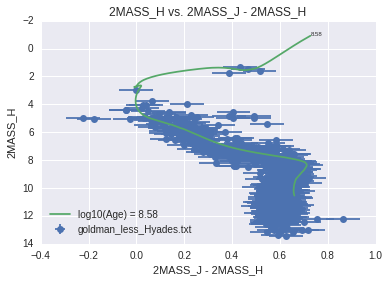

In [9]:
cmdfit.isoplotCMD(0,1, example_isochrone, example_data)

If few datapoints are desired, currently two operations exist:

### datacutmags(lower_limit, upper_limit)

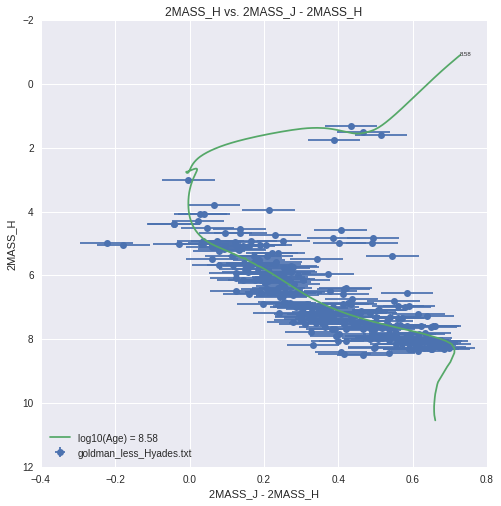

In [10]:
# First I will make a copy of the loaded dataset so that we do not erase the original:
import copy

data_reduced = copy.copy(example_data)

# Now to cut the range of magnitudes:

data_reduced.datacutmags(1, 9)

fig = plt.figure(figsize=(8,8))
# Plotting the reduced data set:
cmdfit.isoplotCMD(0,1, example_isochrone, data_reduced)

### randsamp(number_of_random_samples)

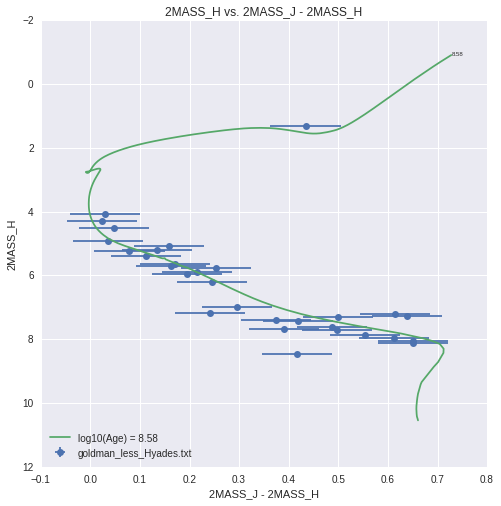

In [11]:
# This function will randomly select the given number of datapoints from the data set that it operates on:
data_reduced.randsamp(30)

fig = plt.figure(figsize=(8,8))
# Plotting the reduced data set:
cmdfit.isoplotCMD(0,1, example_isochrone, data_reduced)

Using these commands, we can examine our data and models. Additionally, a group of isochrones may be plotted as well; this involves first creating an isochrone set:

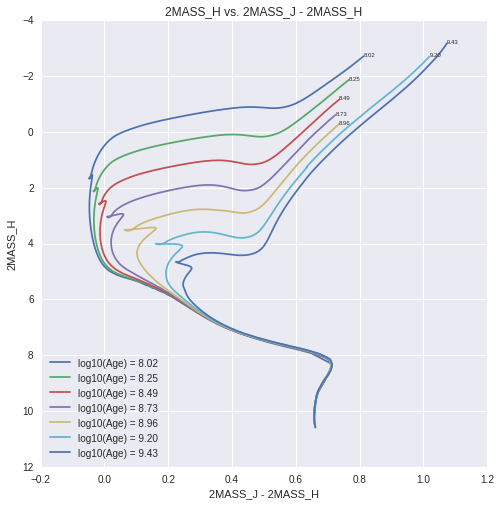

In [12]:
# makeisoset() operates on a model cmdset and takes a lower and upper age limit as input:
isochrone_set = example_model.makeisoset(8.0, 9.6)


fig = plt.figure(figsize=(8,8))
# multiisoCMD() may be used to plot an array of given isochrones:
cmdfit.multiisoCMD(isochrone_set[::5])

The function multiisoCMD() may also be used with a given data set, like so:

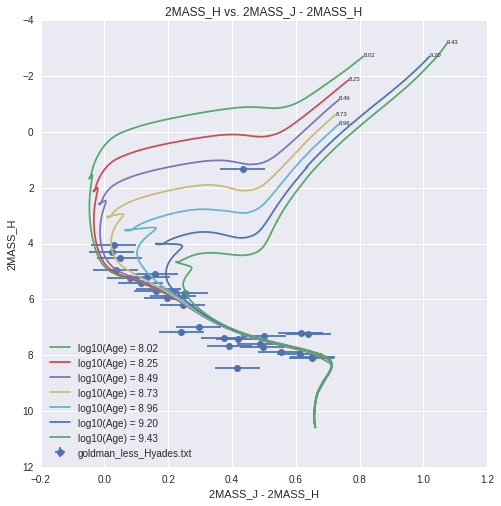

In [13]:
fig = plt.figure(figsize=(8,8))

# multiisoCMD() may be used to plot an array of given isochrones:
cmdfit.multiisoCMD(isochrone_set[::5], data_reduced)

# Fitting Models to Data

The majority of this code has been developed to perform Bayesian parameter estimation of stellar clusters by matching data (like what is shown above) to models (e.g. the isochrones above). To carry out this task, two commands exist:

  * cmdfit.fitall()
  * cmdfit.fitsingle()
  
Right now, the fitall() function is still a WIP. The runtimes are currently very long and I do not advise using it (currently the number of walkers and steps used in  the MCMC algorithms there are very few, and so the statistics are bad, besides the runtimes being very long.)  

The fitsingle() function does work however.

SELECT DESIRED MODEL PATH:
(Reading from /home/seth/Research/CMDfit/CMDfit/cmdfit/model.)
-----------------------------------------------
Select the desired directory from those found below:
0) MIST_v0.31
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired directory from those found below:
0) HBlim005
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired file from those found below:
0) MIST_v0.31_feh_p0.00_afe_p0.0_vvcrit0.4_03to8M_HBlim005_full.iso.cmd
1) MIST_v0.31_feh_m0.25_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
2) MIST_v0.31_feh_m0.10_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
3) MIST_v0.31_feh_m0.05_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
4) MIST_v0.31_feh_p0.15_afe_p0.0_vvcrit0.4_03to8M_

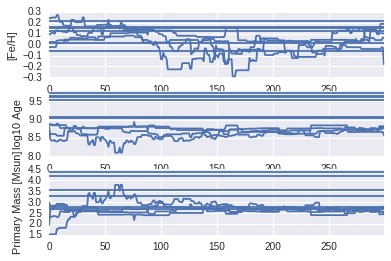

Enter an integer for where to cut off the burn-in period: 100

MAP Values:
      Primary Mass    [Fe/H]  log10 Age
0.16      2.472329 -0.038230   8.535210
0.50      2.699604  0.062506   8.749864
0.84      3.284613  0.163823   9.488931

log10 age = 8.490566 was found.
log10 age = 8.726415 was found.
log10 age = 9.481132 was found.


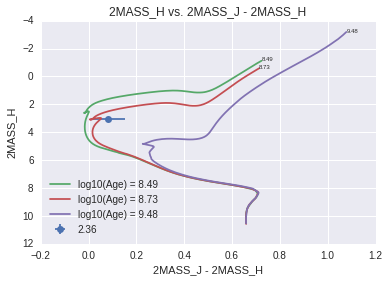


Original Model Parameters:
[0.1, 8.8679245283018879, 2.3599390714989372]



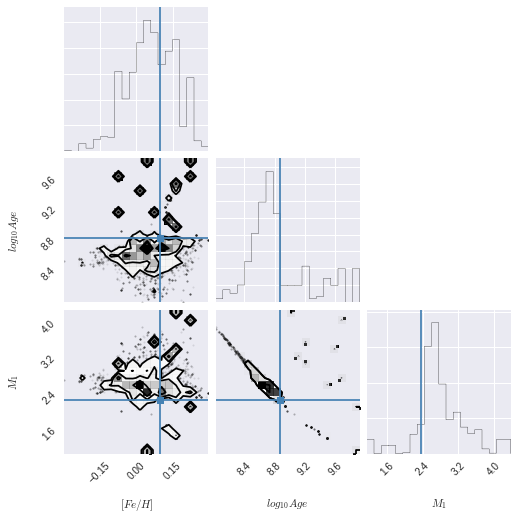

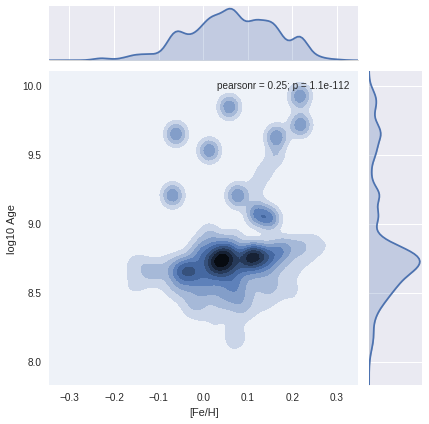

CPU times: user 7min 38s, sys: 848 ms, total: 7min 39s
Wall time: 12min 14s


In [14]:
% time paramframe, sampler = cmdfit.fitsingle('modeltest', ndim=3)

The output above show in order:

 + The walker behavior over the course of 300 steps (only showing first 10).
 + The MAP values found by the samplers
 + A plot of the nearest isochrone found which matches the given star.
 + The original model parameters: [Fe/H, log10 age, initial primary mass]
 + A corner plot showing maringal distributions for the log10 age, initial primary mass, and metallicity.
 + A final joint plot showing the joint posterior found for log10 age and metallicity.
 
The code comes close to finding the original model parameters, however some strange behavior does occur. For example, there is a large island of probability around log10 age = 10. Here, I believe that a walker has become stuck in this low probability region, and has continually sampled there for the entire run. This may be alleviated by adding more walkers or perhaps switching the MCMC algorithm, but more testing is necessary.

Most likely what I need to do is perform an age cut on the models in order to ensure that all of the model isochrones contain the initiall proposed age. What I think is happening is that the walkers starting off near log10 age = 10 do not have isochrones to sample with masses equal to the original model's M = 2.36 or so (these stars have evolved long ago by 10^10 years). Therefore these walkers always sample zero probability and see zero probability all around them, and so they see no reason to move.

I will need to address this to remove the probability islands I think.

SELECT DESIRED MODEL PATH:
(Reading from /home/seth/Research/CMDfit/CMDfit/cmdfit/model.)
-----------------------------------------------
Select the desired directory from those found below:
0) MIST_v0.31
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired directory from those found below:
0) HBlim005
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired file from those found below:
0) MIST_v0.31_feh_p0.00_afe_p0.0_vvcrit0.4_03to8M_HBlim005_full.iso.cmd
1) MIST_v0.31_feh_m0.25_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
2) MIST_v0.31_feh_m0.10_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
3) MIST_v0.31_feh_m0.05_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
4) MIST_v0.31_feh_p0.15_afe_p0.0_vvcrit0.4_03to8M_

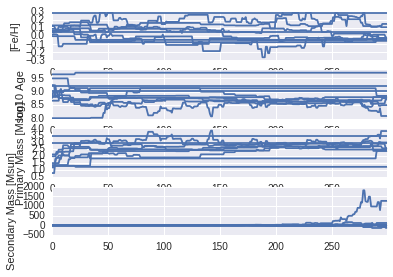

Enter an integer for where to cut off the burn-in period: 200

MAP Values:
      Primary Mass  Secondary Mass    [Fe/H]  log10 Age
0.16      2.266666      -22.024368 -0.039254   8.555110
0.50      2.637533        0.498997  0.067915   8.801255
0.84      3.041880       14.429773  0.223211   9.536464

log10 age = 8.537736 was found.
log10 age = 8.773585 was found.
log10 age = 9.528302 was found.
The magnitudes found for the secondary star: [inf, inf, inf].


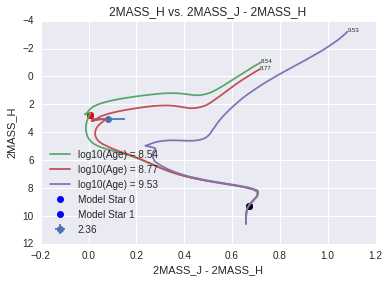


Original Model Parameters:
[0.1, 8.8679245283018879, 2.3599390714989372, 0.5]



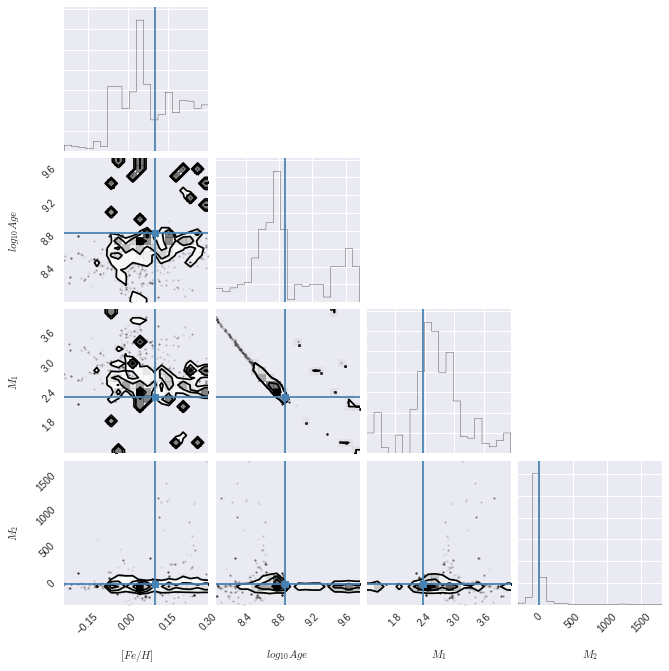

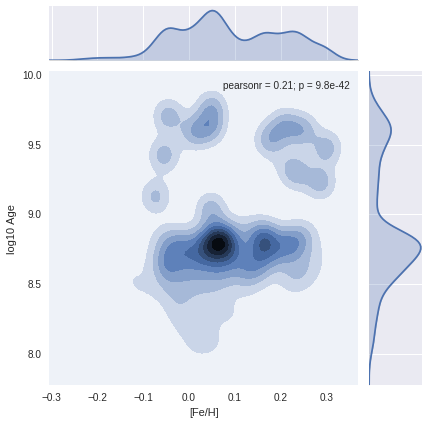

CPU times: user 7min 20s, sys: 584 ms, total: 7min 21s
Wall time: 16min 16s


In [15]:
%time paramframe2, sampler2 = cmdfit.fitsingle('modeltest', ndim=4)

SELECT DESIRED MODEL PATH:
(Reading from /home/seth/Research/CMDfit/CMDfit/cmdfit/model.)
-----------------------------------------------
Select the desired directory from those found below:
0) MIST_v0.31
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired directory from those found below:
0) HBlim005
Enter the index of the desired directory (requesting type: int): 0
-----------------------------------------------
-----------------------------------------------
Select the desired file from those found below:
0) MIST_v0.31_feh_p0.00_afe_p0.0_vvcrit0.4_03to8M_HBlim005_full.iso.cmd
1) MIST_v0.31_feh_m0.25_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
2) MIST_v0.31_feh_m0.10_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
3) MIST_v0.31_feh_m0.05_afe_p0.0_vvcrit0.4_03to8M_HBlim005_fullINTERP.iso.cmd
4) MIST_v0.31_feh_p0.15_afe_p0.0_vvcrit0.4_03to8M_

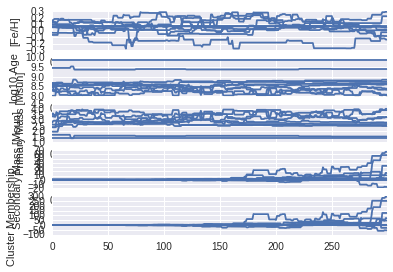

Enter an integer for where to cut off the burn-in period: 175

MAP Values:
         Pfield  Primary Mass  Secondary Mass    [Fe/H]  log10 Age
0.16  -8.607339      2.499814       -1.285490 -0.096434   8.401545
0.50   0.482748      2.720662        0.518718  0.060037   8.726139
0.84  22.262081      3.607700        6.665359  0.168924   9.331265

log10 age = 8.396226 was found.
log10 age = 8.679245 was found.
log10 age = 9.292453 was found.


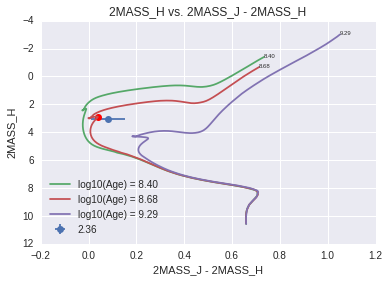


Original Model Parameters:
[0.1, 8.8679245283018879, 2.3599390714989372, 0.5, 0.0]



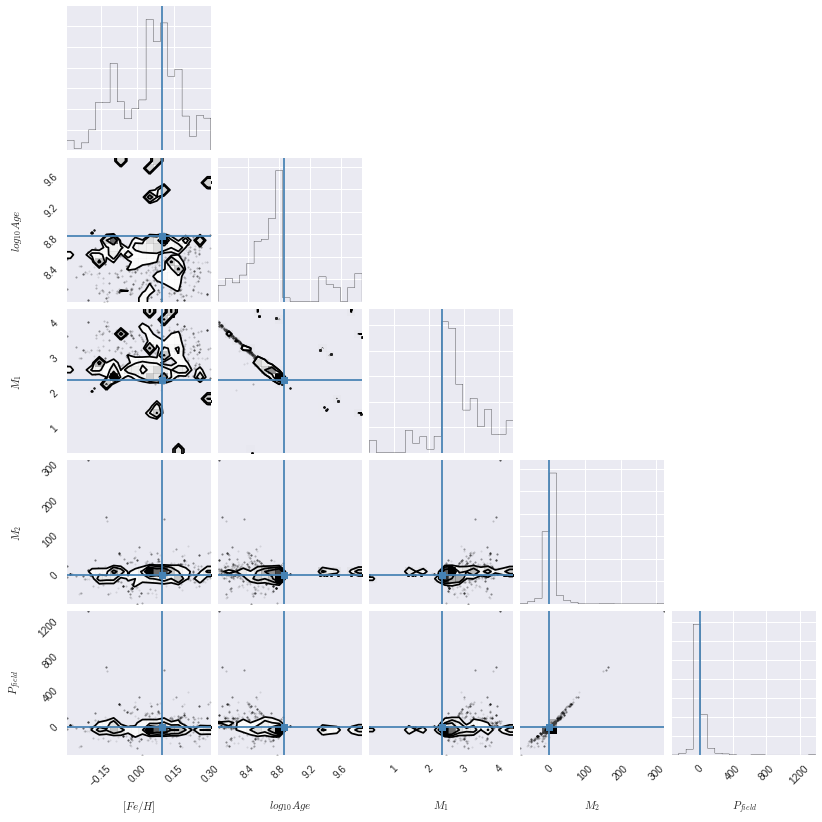

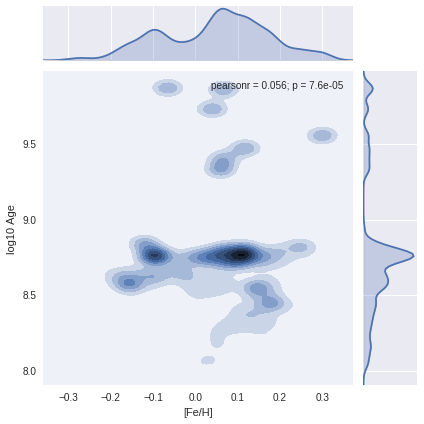

CPU times: user 7min 9s, sys: 376 ms, total: 7min 9s
Wall time: 15min 41s


In [16]:
%time paramframe3, sampler3 = cmdfit.fitsingle('modeltest', ndim=5)